In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/DIABNEW.csv')

In [ ]:
dataset.head()

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),Diabetes Outcome
0,6,50,148,72,35,0,33.6,0.627,No,No,Yes,1,1,1
1,1,31,85,66,29,0,26.6,0.351,No,Yes,No,1,0,0
2,8,32,183,64,0,0,23.3,0.672,Yes,No,No,0,1,1
3,1,21,89,66,23,94,28.1,0.167,Yes,No,No,0,0,0
4,0,33,137,40,35,168,43.1,2.288,Yes,Yes,Yes,0,1,1


In [ ]:
dataset['Polyphagia'] = dataset['Polyphagia'].replace({'Yes': 1, 'No': 0})
dataset['Visual Blurring'] = dataset['Visual Blurring'].replace({'Yes': 1, 'No': 0})
dataset['Obesity'] = dataset['Obesity'].replace({'Yes': 1, 'No': 0})

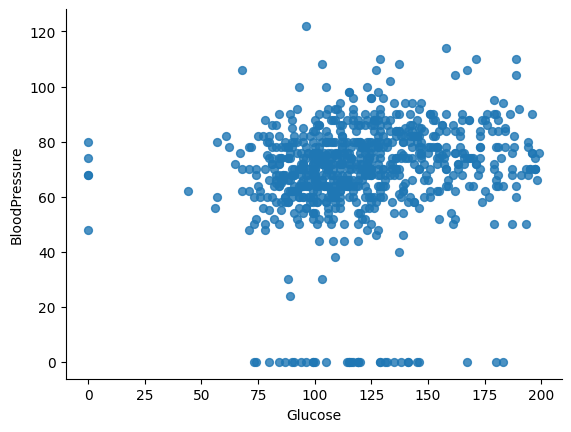

In [ ]:
# @title Glucose vs BloodPressure

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset.describe()

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),Diabetes Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,33.240885,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,0.432292,0.434896,0.169271,0.467448,0.528646,0.348958
std,3.369578,11.760232,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,0.495717,0.496066,0.375235,0.499264,0.499504,0.476951
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,24.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.000000,41.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,17.000000,81.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

# List of attribute columns to be converted
attributes_to_check = ['Polyphagia', 'Visual Blurring', 'Obesity']


for attribute in attributes_to_check:
    unique_values = dataset[attribute].unique()
    print(f"Unique values in {attribute}: {unique_values}")

for attribute in attributes_to_check:
    dataset.loc[~dataset[attribute].isin(['yes', 'no']), attribute] = np.nan

for attribute in attributes_to_check:
    dataset[attribute] = dataset[attribute].map({'yes': 1, 'no': 0})

Unique values in Polyphagia: [0 1]
Unique values in Visual Blurring: [0 1]
Unique values in Obesity: [1 0]


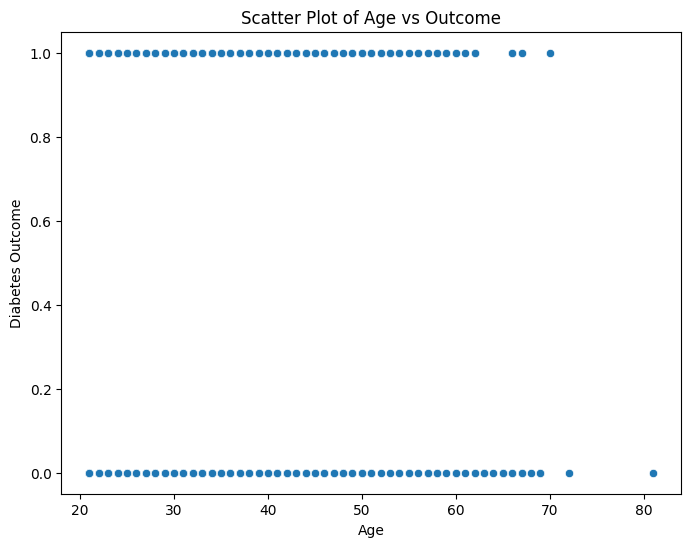

<Figure size 1000x800 with 0 Axes>

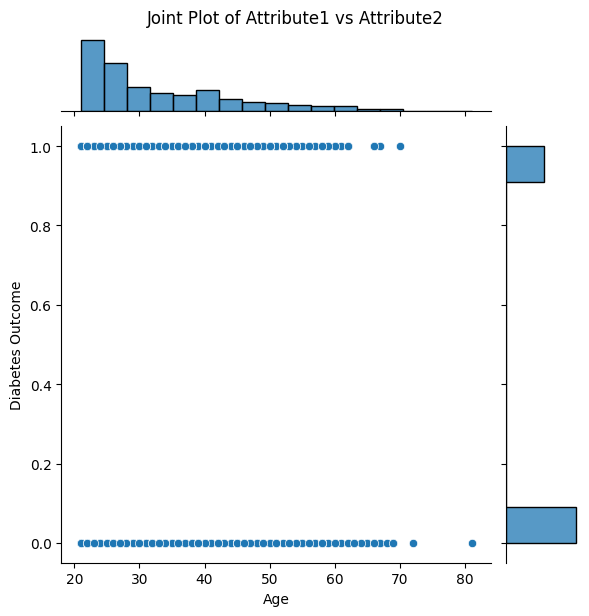

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'attribute1' and 'attribute2'
# Replace 'attribute1' and 'attribute2' with your actual column names

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Diabetes Outcome', data=dataset)
plt.title('Scatter Plot of Age vs Outcome')
plt.show()

# Joint Plot
plt.figure(figsize=(10, 8))
sns.jointplot(x='Age', y='Diabetes Outcome', data=dataset, kind='scatter')
plt.suptitle('Joint Plot of Attribute1 vs Attribute2', y=1.02)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Diabetes Outcome",axis=1)
target = dataset["Diabetes Outcome"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/drive/MyDrive/DIABNEW.csv')

# Handle missing values (fill with mean, median, or mode)
# df.fillna(df.mean(), inplace=True)

# Handle categorical variables (label encoding for simplicity)
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Split the data into features (X) and target variable (y)
X = df.drop('Diabetes Outcome', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Diabetes Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Make predictions
Y_pred_lr = lr.predict(X_test)

# Calculate the accuracy score
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

# Print the accuracy score
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 79.87 %


F1 Score: 0.67
Precision: 0.82
Recall: 0.56


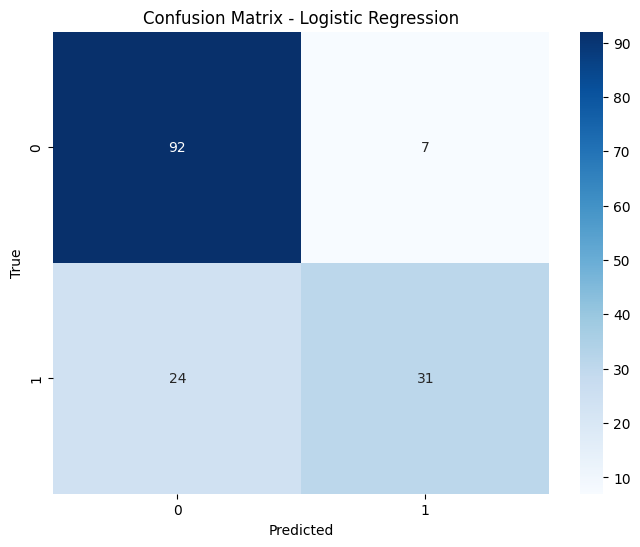

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# F1 Score
f1_lr = f1_score(Y_test, Y_pred_lr)
print("F1 Score: {:.2f}".format(f1_lr))

# Precision
precision_lr = precision_score(Y_test, Y_pred_lr)
print("Precision: {:.2f}".format(precision_lr))

# Recall
recall_lr = recall_score(Y_test, Y_pred_lr)
print("Recall: {:.2f}".format(recall_lr))

# Confusion Matrix
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='poly')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 75.32 %


F1 Score: 0.60
Precision: 0.71
Recall: 0.53


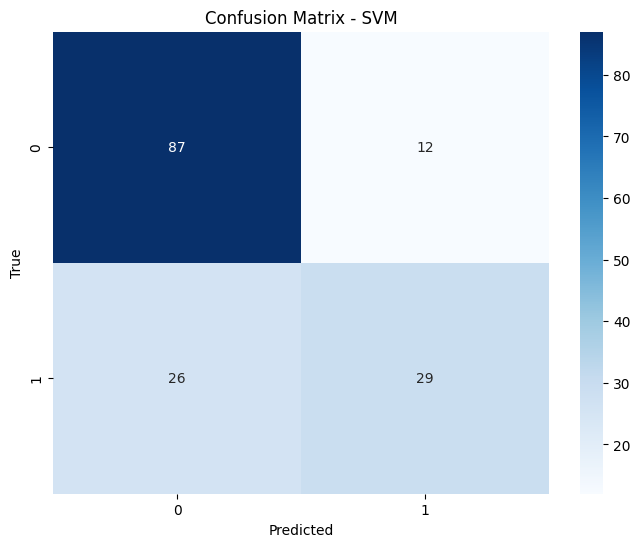

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using SVM
Y_pred_svm = sv.predict(X_test)

# F1 Score
f1_svm = f1_score(Y_test, Y_pred_svm)
print("F1 Score: {:.2f}".format(f1_svm))

# Precision
precision_svm = precision_score(Y_test, Y_pred_svm)
print("Precision: {:.2f}".format(precision_svm))

# Recall
recall_svm = recall_score(Y_test, Y_pred_svm)
print("Recall: {:.2f}".format(recall_svm))

# Confusion Matrix
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming X_train, Y_train, X_test, and Y_test are defined

# Create the SVM model
sv = svm.SVC(kernel='poly')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(sv, X_train, Y_train, cv=5)

# Fit the model on the training data
sv.fit(X_train, Y_train)

# Predict on the test set
Y_pred_svm = sv.predict(X_test)

# Calculate accuracy on the test set
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)

# Calculate mean cross-validation score
mean_cv_score = round(cv_scores.mean() * 100, 2)

print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")
print("The mean cross-validation score is: " + str(mean_cv_score) + " %")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.83 %
The accuracy score achieved using KNN is: 68.83 %


F1 Score: 0.59
Precision: 0.56
Recall: 0.62


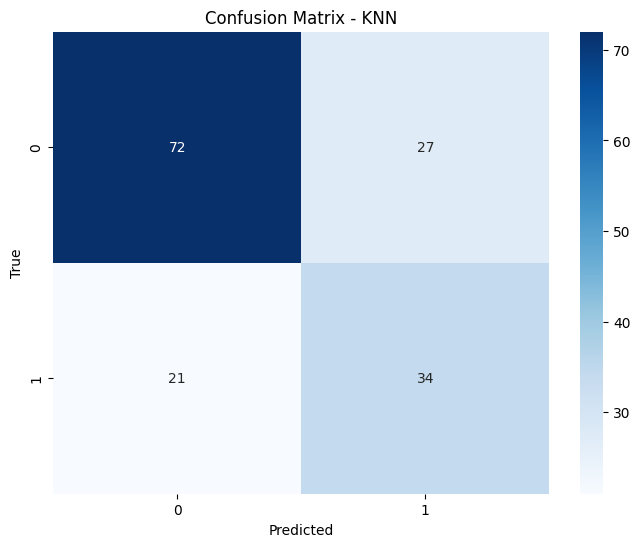

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using KNN
Y_pred_knn = knn.predict(X_test)

# F1 Score
f1_knn = f1_score(Y_test, Y_pred_knn)
print("F1 Score: {:.2f}".format(f1_knn))

# Precision
precision_knn = precision_score(Y_test, Y_pred_knn)
print("Precision: {:.2f}".format(precision_knn))

# Recall
recall_knn = recall_score(Y_test, Y_pred_knn)
print("Recall: {:.2f}".format(recall_knn))

# Confusion Matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(1500):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.57 %
The accuracy score achieved using Decision Tree is: 78.57 %


F1 Score: 0.70
Precision: 0.70
Recall: 0.71


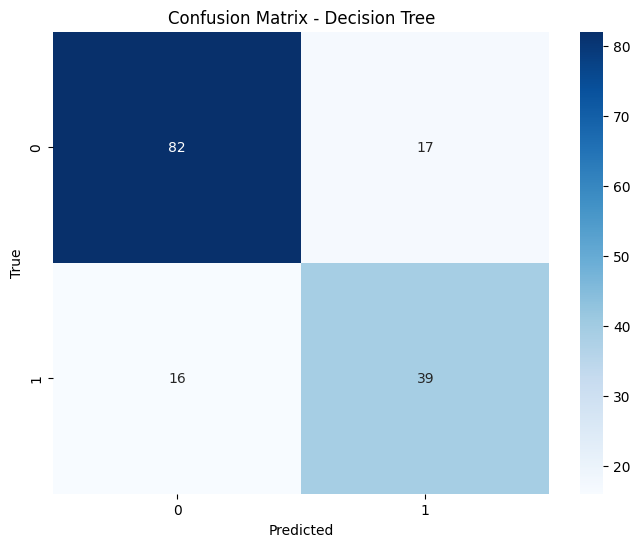

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using Decision Tree
Y_pred_dt = dt.predict(X_test)

# F1 Score
f1_dt = f1_score(Y_test, Y_pred_dt)
print("F1 Score: {:.2f}".format(f1_dt))

# Precision
precision_dt = precision_score(Y_test, Y_pred_dt)
print("Precision: {:.2f}".format(precision_dt))

# Recall
recall_dt = recall_score(Y_test, Y_pred_dt)
print("Recall: {:.2f}".format(recall_dt))

# Confusion Matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(30):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Random  Forst is: "+str(score_rf)+" %")

The accuracy score achieved using Random  Forst is: 77.27 %


F1 Score: 0.67
Precision: 0.69
Recall: 0.65


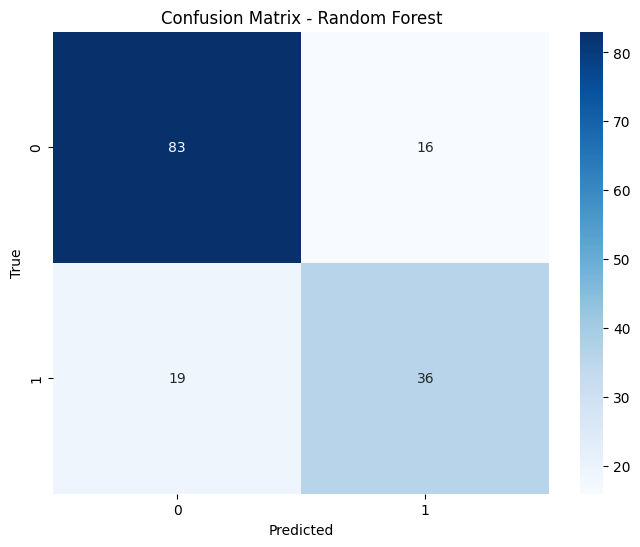

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using Random Forest
Y_pred_rf = rf.predict(X_test)

# F1 Score
f1_rf = f1_score(Y_test, Y_pred_rf)
print("F1 Score: {:.2f}".format(f1_rf))

# Precision
precision_rf = precision_score(Y_test, Y_pred_rf)
print("Precision: {:.2f}".format(precision_rf))

# Recall
recall_rf = recall_score(Y_test, Y_pred_rf)
print("Recall: {:.2f}".format(recall_rf))

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# The ANN part

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset=dataset.astype(float)

In [ ]:
dataset.head()

In [ ]:
mapping = {'No': 0, 'Yes': 1}

In [ ]:
dataset['Polyphagia	'] = dataset['Polyphagia'].map(mapping)

In [ ]:
dataset['Visual Blurring'] = dataset['Visual Blurring'].map(mapping)

In [ ]:
dataset['Obesity'] = dataset['Obesity'].map(mapping)

In [ ]:
dataset.head()

In [ ]:
attributes_to_drop = ['Polyphagia\t']

# Drop the specified attributes from the DataFrame
dataset.drop(columns=attributes_to_drop, inplace=True)

In [ ]:
dataset.info()

In [ ]:
dataset.columns

In [ ]:
dataset.columns

In [ ]:
dataset.head(

)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


In [ ]:
print(type(y_train))

In [ ]:
import numpy as np

if type(y_train) is not np.ndarray:
    y_train = np.array(y_train)

In [ ]:
print(y_train.dtype)

In [ ]:
if y_train.dtype not in [np.int32, np.int64]:
    y_train = y_train.astype(np.int32)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)